In [7]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 30.2 MB/s eta 0:00:00


Случайная температура: 21°C
Случайная влажность: 20%
Скорость вентилятора: 29.999999999999993%
Случайная температура: 31°C
Случайная влажность: 81%
Скорость вентилятора: 87.54421768707485%
Случайная температура: 18°C
Случайная влажность: 82%
Скорость вентилятора: 87.74999999999997%
Случайная температура: 18°C
Случайная влажность: 61%
Скорость вентилятора: 60.00000000000004%
Случайная температура: 38°C
Случайная влажность: 64%
Скорость вентилятора: 88.5151515151515%


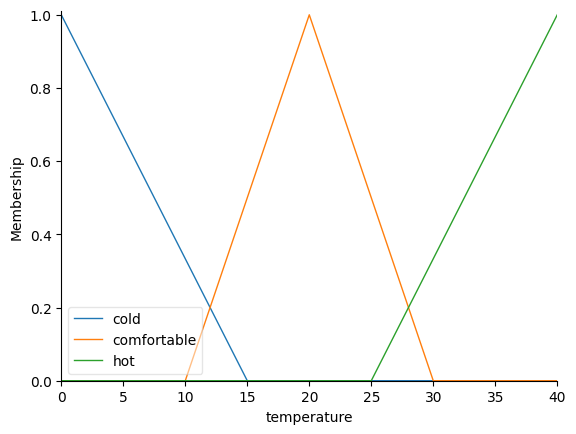

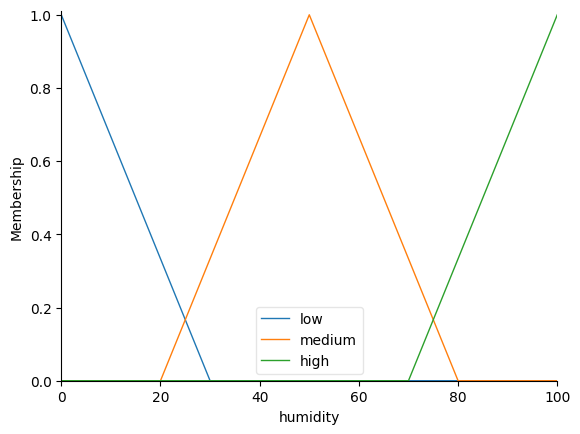

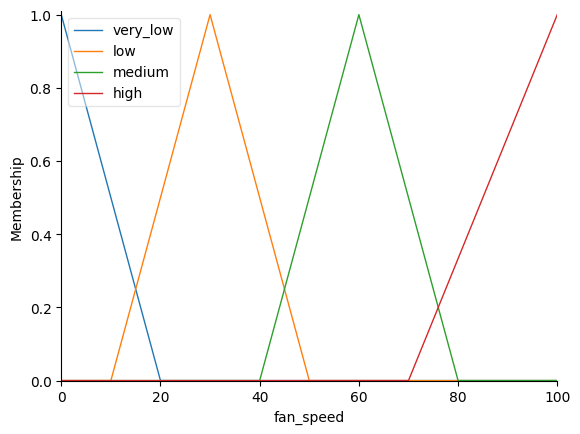

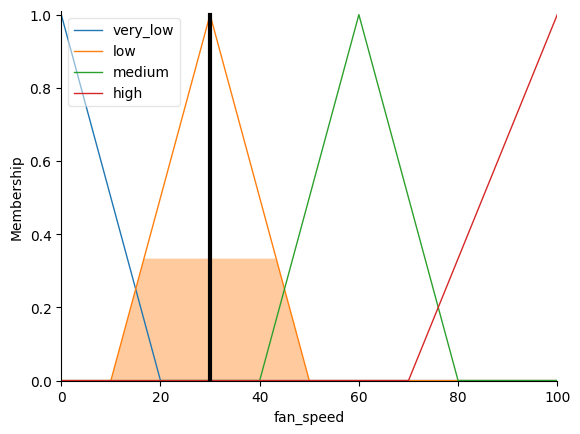

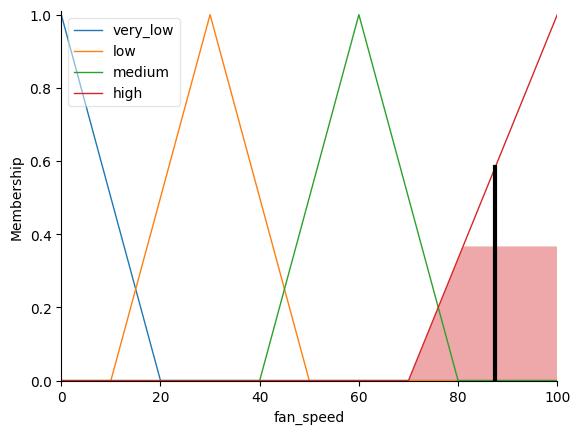

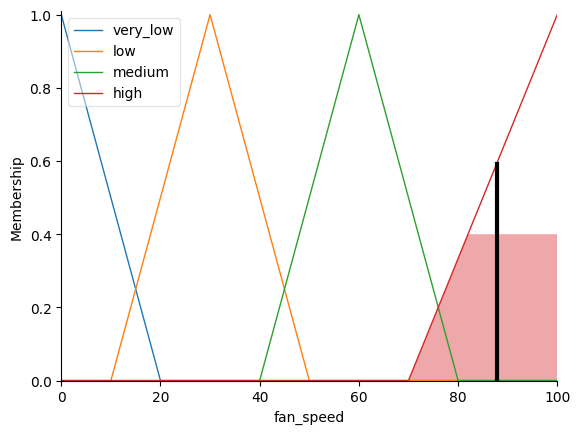

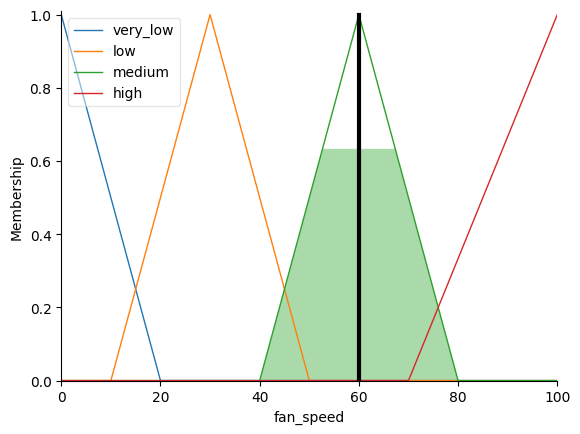

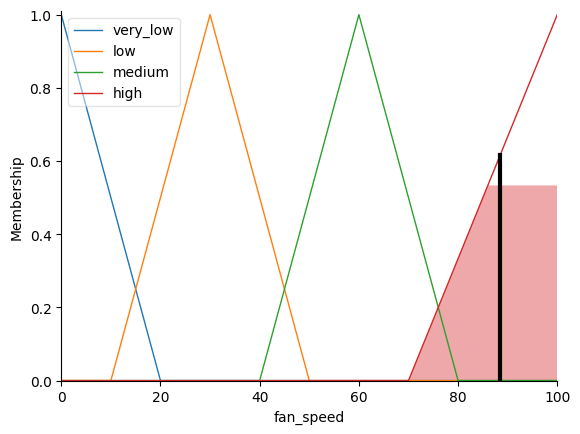

In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Входные переменные
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')  # температура (0-40°C)
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')  # относительная влажность (0-100%)

# Выходная переменная
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')  # скорость вентилятора (0-100%)

# Нечеткие множества
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 15])
temperature['comfortable'] = fuzz.trimf(temperature.universe, [10, 20, 30])
temperature['hot'] = fuzz.trimf(temperature.universe, [25, 40, 40])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 30])
humidity['medium'] = fuzz.trimf(humidity.universe, [20, 50, 80])
humidity['high'] = fuzz.trimf(humidity.universe, [70, 100, 100])

fan_speed['very_low'] = fuzz.trimf(fan_speed.universe, [0, 0, 20])
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [10, 30, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [40, 60, 80])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [70, 100, 100])


# Правила для управления вентилятором
rule1 = ctrl.Rule((temperature['cold'] & humidity['low']), fan_speed['very_low'])


rule2 = ctrl.Rule((temperature['cold'] & humidity['medium']) |
                  (temperature['comfortable'] & humidity['low']), fan_speed['low'])


rule3 = ctrl.Rule((temperature['cold'] & humidity['high']) |
                  (temperature['comfortable'] & humidity['medium']) |
                  (temperature['hot'] & humidity['low']), fan_speed['medium'])


rule4 = ctrl.Rule((temperature['comfortable'] & humidity['high']) |
                  (temperature['hot'] & humidity['medium']) |
                  (temperature['hot'] & humidity['high']), fan_speed['high'])


# Создание и симуляция контроллера
fan_control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
fan_simulation = ctrl.ControlSystemSimulation(fan_control_system)

temperature.view()
humidity.view()
fan_speed.view()


# Функция для получения случайного значения температуры
def get_random_temperature():
    return np.random.randint(0, 41)


# Функция для получения случайного значения влажности
def get_random_humidity():
    return np.random.randint(0, 101)


random_temperature = get_random_temperature()
random_humidity = get_random_humidity()

# Вывод информации
print(f"Случайная температура: {random_temperature}°C")
print(f"Случайная влажность: {random_humidity}%")

fan_simulation.input['temperature'] = random_temperature
fan_simulation.input['humidity'] = random_humidity

# Вычисление результата
fan_simulation.compute()
print(f"Скорость вентилятора: {fan_simulation.output['fan_speed']}%")

# Визуализация результата
fan_speed.view(sim=fan_simulation)

# Повторная симуляция с другими случайными значениями
for _ in range(4):
    random_temperature = get_random_temperature()
    random_humidity = get_random_humidity()

    fan_simulation.input['temperature'] = random_temperature
    fan_simulation.input['humidity'] = random_humidity
    fan_simulation.compute()

    print(f"Случайная температура: {random_temperature}°C")
    print(f"Случайная влажность: {random_humidity}%")
    print(f"Скорость вентилятора: {fan_simulation.output['fan_speed']}%")

    fan_speed.view(sim=fan_simulation)